## Importing Libraries

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Loading UCI Dataset and Data preprocessing

In [58]:
df = pd.read_csv('HTRU_2.csv')

In [59]:
names= ['mean ip','sd ip', 'excess ip', 'skew ip', 'mean DM', 'sd DM', 'excess DM', 'skew DM','class']
df.columns=names
df.columns

Index(['mean ip', 'sd ip', 'excess ip', 'skew ip', 'mean DM', 'sd DM',
       'excess DM', 'skew DM', 'class'],
      dtype='object')

In [60]:
df.head()

,mean ip,sd ip,excess ip,skew ip,mean DM,sd DM,excess DM,skew DM,class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [61]:
df.shape

(17897, 9)

In [62]:
df.isnull().sum()

mean ip      0
sd ip        0
excess ip    0
skew ip      0
mean DM      0
sd DM        0
excess DM    0
skew DM      0
class        0
dtype: int64

## Plotting Class Frequency

<AxesSubplot:xlabel='class', ylabel='count'>

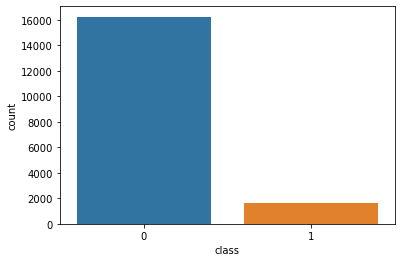

In [63]:
sns.countplot(x = 'class', data=df)

## Dividing dataset into data and label

In [64]:
X = df.iloc[:,0:7]
y = df['class']

In [ ]:
ss = StandardScaler()
ss.fit_transform(X)

## Dividing the Dataset into  70-30 from training and testing and Creating 10 samples from dataset 

In [72]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))


In [73]:
samples

[(          mean ip      sd ip  excess ip   skew ip    mean DM      sd DM  \
  5018   136.671875  58.582622  -0.383323 -0.511884   1.594482  16.245203   
  9652   121.539062  45.725216  -0.026729  0.287433   0.983278  12.820528   
  10534  125.656250  45.416379   0.229545  0.500913   3.214047  22.259627   
  4353   116.757812  46.314439   0.184255 -0.225722   1.484114  14.717652   
  4055   121.335938  42.362328   0.278590  0.373979   2.438963  18.622471   
  ...           ...        ...        ...       ...        ...        ...   
  9225    88.984375  37.286472   0.516412  2.057365   2.958194  17.127935   
  13123  120.335938  49.548631  -0.016550 -0.284696  18.019231  49.620134   
  9845   122.023438  51.412922   0.030145 -0.419453   3.316890  22.020682   
  10799  117.039062  68.916095   0.004967 -1.342554  73.581940  96.213674   
  2732   121.203125  41.781679   0.260015  0.240895   4.461538  23.399812   
  
         excess DM  
  5018   11.399790  
  9652   15.165444  
  10534   

## Creating Fitness Function for Accuracy Score

In [74]:
def fitnessFunction(k, n, e):
    svm = SVC(kernel=k, C=n, gamma=e, max_iter=1000)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return accuracy_score(y_pred, y_test)

#### Initializing the parameters

In [75]:
bestAcc=0
bestKern=""
bestNu=0
bestEpilson=0
itr=1000
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [76]:
result = pd.DataFrame(columns=['Sample No', 'bestAccuracy', 'bestKernel', 'bestNu', 'bestEpsilon'])

## Applying fitness function on each of the 10 samples

In [77]:
accs = []
for i in range(len(samples)):
    for kernel in kernels:
        X_train, X_test, y_train, y_test = samples[i]
        n = np.random.uniform(0, 10)
        e = np.random.uniform(0, 10)
        acc = fitnessFunction(kernel, n, e)
        if acc>bestAcc:
            bestAcc = acc
            bestNu = n
            bestEpsilon = e
            bestKern = kernel
    accs.append(acc)
    print('SampleNo:',i+1,'BestAcc =', round(bestAcc*100,2),'%', ', BestK =', bestKern,', BestNu =', bestNu, ',Best e =', bestEpsilon)
    result.loc[i] = [i+1, bestAcc, bestKern, bestNu, bestEpsilon]

SampleNo: 1 BestAcc = 91.88 % , BestK = poly , BestNu = 1.2326274491639755 ,Best e = 3.047165523072095
SampleNo: 2 BestAcc = 92.23 % , BestK = linear , BestNu = 9.160270988053213 ,Best e = 8.909309336232432
SampleNo: 3 BestAcc = 92.23 % , BestK = linear , BestNu = 9.160270988053213 ,Best e = 8.909309336232432
SampleNo: 4 BestAcc = 92.23 % , BestK = linear , BestNu = 9.160270988053213 ,Best e = 8.909309336232432
SampleNo: 5 BestAcc = 93.48 % , BestK = rbf , BestNu = 0.18836153123472532 ,Best e = 3.352528472626161
SampleNo: 6 BestAcc = 95.55 % , BestK = linear , BestNu = 0.9191952281507976 ,Best e = 5.200294469484654
SampleNo: 7 BestAcc = 95.88 % , BestK = linear , BestNu = 9.120805882859411 ,Best e = 0.6425680349794538
SampleNo: 8 BestAcc = 95.88 % , BestK = linear , BestNu = 9.120805882859411 ,Best e = 0.6425680349794538
SampleNo: 9 BestAcc = 95.88 % , BestK = linear , BestNu = 9.120805882859411 ,Best e = 0.6425680349794538
SampleNo: 10 BestAcc = 95.88 % , BestK = linear , BestNu = 9.1

## Required Table showing best parameters for each sample

In [15]:
result

,Sample No,bestAccuracy,bestKernel,bestNu,bestEpsilon
0,1,0.913222,sigmoid,1.975787,2.332984
1,2,0.922346,linear,6.598598,7.408117
2,3,0.922346,linear,6.598598,7.408117
3,4,0.922346,linear,6.598598,7.408117
4,5,0.924581,poly,2.668028,8.915116
5,6,0.924581,poly,2.668028,8.915116
6,7,0.958845,linear,3.301220,3.808052
7,8,0.958845,linear,3.301220,3.808052
8,9,0.958845,linear,3.301220,3.808052
9,10,0.958845,linear,3.301220,3.808052


In [78]:
accs

[0.913221601489758,
 0.907635009310987,
 0.09515828677839851,
 0.09068901303538175,
 0.9113594040968342,
 0.9057728119180634,
 0.08845437616387337,
 0.9085661080074487,
 0.08975791433891993,
 0.09236499068901304]

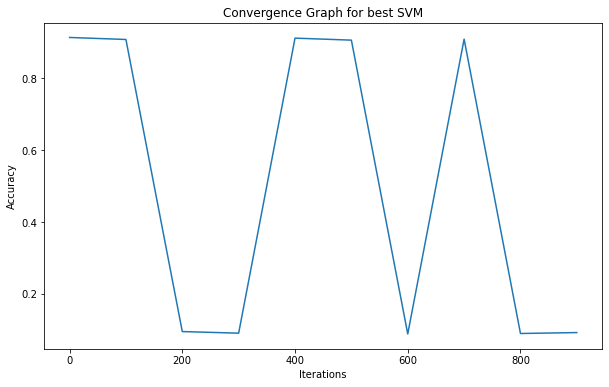

In [80]:
iters = list(range(0, 1000,100))
plt.figure(figsize=(10, 6))
plt.plot(iters, accs)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph for best SVM')
plt.show()